In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
batch_size = 64
learning_rate = 0.001
num_epochs = 5

# Download and prepare the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # Import tqdm for progress bar

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the CNN model
model = CNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the CNN model with progress bar and accuracy
num_epochs = 5

for epoch in range(num_epochs):
    # Initialize tqdm progress bar
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    # Variables to track accuracy
    total_correct = 0
    total_images = 0

    for i, (images, labels) in progress_bar:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate predictions and accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        accuracy = 100 * total_correct / total_images

        # Update progress bar with loss and accuracy
        progress_bar.set_postfix({"Train_Loss": loss.item(), "Train_Accuracy": f"{accuracy:.2f}%"})

# Save the model checkpoint
torch.save(model.state_dict(), 'mnist_cnn.pth')


Epoch 5/5: 100%|██████████| 938/938 [01:37<00:00,  9.59it/s, Train_Loss=0.0189, Train_Accuracy=99.40%]


In [10]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bar


# Initialize tqdm progress bar for testing
with torch.no_grad():
    progress_bar = tqdm(test_loader, desc="Testing Progress")
    for images, labels in progress_bar:
        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Accumulate total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect misclassified images and labels for visualization
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i].squeeze())
                misclassified_labels.append((predicted[i].item(), labels[i].item()))

# Calculate accuracy
accuracy = 100 * correct / total
print(f'\nFinal Accuracy of the model on the 10000 test images: {accuracy:.2f}%')




Testing Progress: 100%|██████████| 157/157 [00:07<00:00, 20.87it/s]


Final Accuracy of the model on the 10000 test images: 99.03%



Visualizing some misclassified examples:
Predicted: 8, Actual: 3


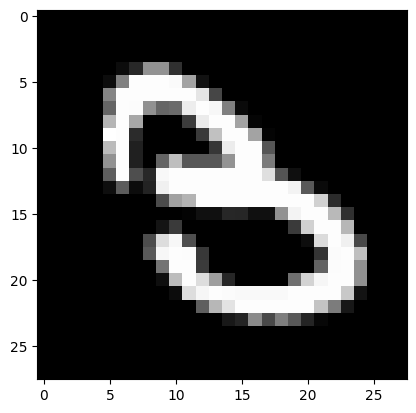

Predicted: 4, Actual: 9


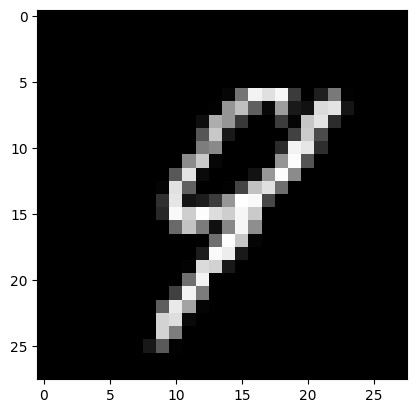

Predicted: 3, Actual: 5


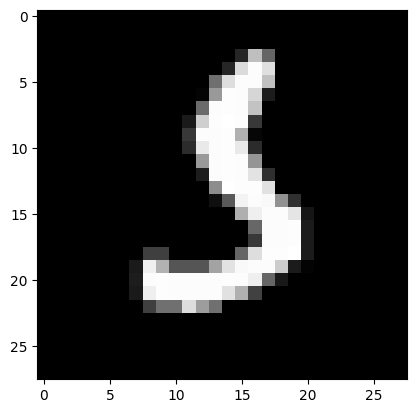

Predicted: 4, Actual: 9


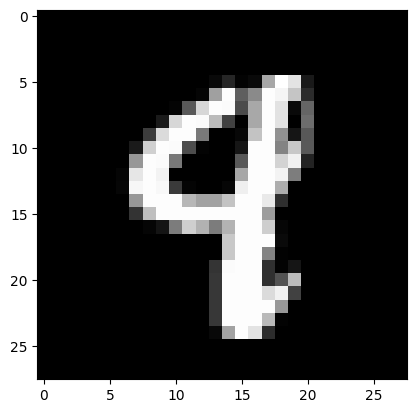

Predicted: 5, Actual: 3


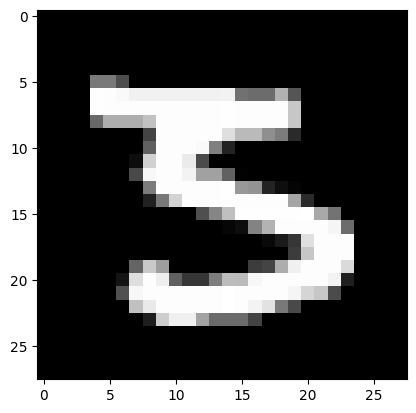

In [9]:
# Visualize misclassified examples
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.show()

print("\nVisualizing some misclassified examples:")
for i in range(5):
    print(f"Predicted: {misclassified_labels[i][0]}, Actual: {misclassified_labels[i][1]}")
    imshow(misclassified_images[i])
